## YOLOv8 Plate Reading

Environment

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/Turkish Plate Recognition

/content/drive/MyDrive/Turkish Plate Recognition


In [ ]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/201.2 GB disk)


Dataset

In [ ]:
!unzip read_data/okuma.zip -d ./read_data

Train

In [ ]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=100 patience=30 imgsz=640 workers=8 batch=12 device=0 name=yolov8n-plate-reading

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=100, time=None, patience=30, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8n-plate-reading2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [ ]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=100 patience=30 imgsz=320 workers=8 batch=12 device=0 name=yolov8n-plate-reading

In [ ]:
#!yolo detect train model="runs/detect/yolov8n-plate-reading/weights/last.pt" resume=True

Prediction - Custom Model

In [ ]:
!yolo detect predict model=runs/detect/yolov8n-plate-reading2/weights/best.pt source=read_data/okuma/images/test save=True

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,012,473 parameters, 0 gradients, 8.1 GFLOPs

image 1/197 /content/drive/MyDrive/Turkish Plate Recognition/read_data/okuma/images/test/1000_jpg.rf.4939ac9fd4dc3d73a0136eee1cc5426c.jpg: 384x640 1 0, 1 1, 1 3, 2 5s, 2 8s, 1 D, 1 K, 99.3ms
image 2/197 /content/drive/MyDrive/Turkish Plate Recognition/read_data/okuma/images/test/1001_jpg.rf.19fd838dfd218f7bd044662a2d65de7b.jpg: 256x640 1 1, 1 3, 2 5s, 2 8s, 1 D, 1 K, 142.6ms
image 3/197 /content/drive/MyDrive/Turkish Plate Recognition/read_data/okuma/images/test/1001_jpg.rf.25f313b651bae4e5d833f1c777df6e96.jpg: 256x640 1 1, 1 3, 2 5s, 2 8s, 1 D, 1 K, 8.0ms
image 4/197 /content/drive/MyDrive/Turkish Plate Recognition/read_data/okuma/images/test/1001_jpg.rf.f3b35d7f1b9923210849e4eee023cf84.jpg: 256x640 1 1, 1 3, 2 5s, 2 8s, 1 D, 1 K, 7.1ms
image 5/197 /content/drive/MyDrive/Turkish Plate Recognition/read_data/okuma/images

Python Implementation - Custom Model

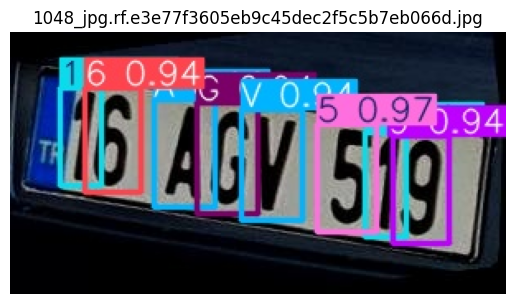

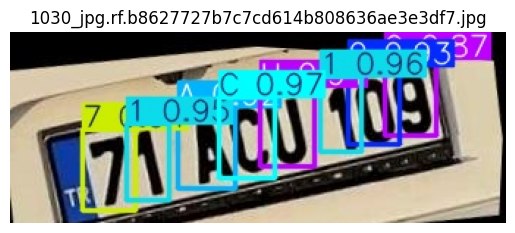

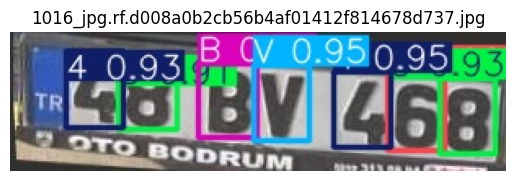

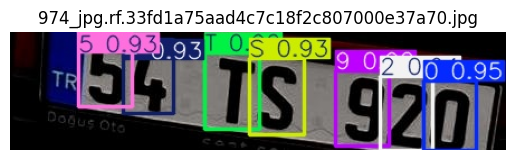

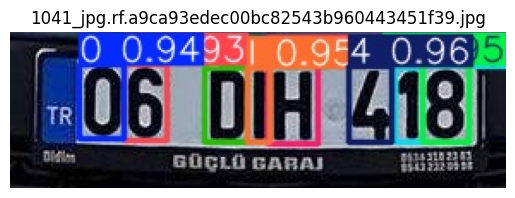

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# YOLO modelinden elde edilen tahminlerin bulunduğu klasör
predict_folder = 'runs/detect/predict3'

# Çıktı fotoğraflarının isimlerini al
image_files = [f for f in os.listdir(predict_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Rastgele 5 fotoğraf seç
selected_files = random.sample(image_files, 5)

# Fotoğrafları yükle ve göster
for image_file in selected_files:
    # Fotoğrafı oku
    img_path = os.path.join(predict_folder, image_file)
    image = cv2.imread(img_path)

    # Fotoğrafı RGB formatına çevir
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Klasördeki her fotoğraf, tahmin sonuçlarını içeren bir 'labels.txt' dosyası ile birlikte gelmeli
    # Bu dosya genellikle tahmin edilen sınıfları ve bounding box koordinatlarını içerir
    label_file_path = img_path.replace('.jpg', '.txt').replace('.png', '.txt')

    if os.path.exists(label_file_path):
        with open(label_file_path, 'r') as file:
            for line in file:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])

                # Fotoğraf boyutlarını al
                h, w, _ = image.shape

                # Koordinatları piksel değerlerine dönüştür
                x_center *= w
                y_center *= h
                width *= w
                height *= h

                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                # Bounding box çizgisi
                cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 1)  # İnce çizgi
                cv2.putText(image_rgb, f'Class {class_id}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Fotoğrafı matplotlib ile göster
    plt.imshow(image_rgb)
    plt.title(image_file)
    plt.axis('off')  # Eksenleri gizle
    plt.show()


In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np

In [20]:
import cv2
from ultralytics import YOLO
import numpy as np

# YOLOv8 modelini yükle
model_path = 'runs/detect/yolov8n-plate-reading2/weights/best.pt'  # Model yolunu buraya ekleyin
model = YOLO(model_path)

# Video dosyalarını belirtin
input_video_path = 'data/araba2.mp4'
output_video_path = 'data/output_video2.mp4'

# Video işleme
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Fotoğrafı model için uygun formata dönüştür
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(img)

    # Tahmin sonuçlarını işleme
    for result in results:
        boxes = result.boxes
        names = result.names

        # Bounding box'ları numpy dizisine çevir
        xyxy = boxes.xyxy.cpu().numpy()
        conf = boxes.conf.cpu().numpy()
        cls = boxes.cls.cpu().numpy()

        for i in range(len(xyxy)):
            x1, y1, x2, y2 = map(int, xyxy[i])
            confidence = conf[i]
            class_id = int(cls[i])
            cls_name = names[class_id]

            # Bounding box ve sınıf etiketini çiz
            color = (0, 255, 0)  # Yeşil renk
            label = f'{cls_name} ({confidence:.2f})'
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Çıktı videosuna frame yaz
    out.write(frame)

# Video dosyalarını serbest bırak
cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 1 3, 1 4, 1 G, 2 Ss, 105.9ms
Speed: 2.1ms preprocess, 105.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 3s, 1 4, 2 Ss, 11.6ms
Speed: 2.5ms preprocess, 11.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 3s, 1 4, 3 Ss, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 3, 1 G, 1 L, 1 S, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 3s, 1 4, 1 L, 2 Ss, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 3, 1 4, 1 G, 1 L, 1 S, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 3s, 1 4, 1 S, 13.9ms
Speed: 2.9ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 3, 1 4, 1 G, 2 Ss, 15.4ms
Speed: 2.3

In [24]:
from IPython.display import HTML
from IPython.display import display

def display_video(video_path):
    """Colab'da bir video dosyasını oynatır."""
    video_tag = f"""
    <video width="640" height="480" controls>
      <source src="{video_path}" type="video/mp4">
      Your browser does not support the video tag.
    </video>
    """
    display(HTML(video_tag))

# Video dosyasının yolunu buraya ekleyin
video_path = 'output_video2.mp4'  # Yüklediğiniz dosyanın adı
display_video(video_path)
